# Project Data Wrangling Pandas

The Olist Store dataset is a valuable collection of information encompassing 100,000 orders placed on an e-commerce platform in Brazil. This dataset provides insights into the operations of the Olist Store, covering a period from 2016 to 2018. It offers detailed information about various aspects of the orders, including their status, pricing, payment, and shipping performance. Additionally, the dataset offers valuable insights into customer demographics, product attributes, and customer reviews. To ensure privacy, all references to specific companies and partners have been replaced with names from the popular Game of Thrones series. This article aims to provide an in-depth analysis of the dataset, shedding light on the various aspects of e-commerce operations in Brazil.

For creating answer for decision making, This is our to-do list:
1. Objectives
2. Data Preparation
3. EDA (Exploratory Data Analysis)
    - a. Identify NaN
    - b. Identify data types
    - c. Identify duplicate data
    - d. Identify inconsistent variables
    - e. Identify Outlier
4. Start Analysis

### 1. Objectives
I have create some objectives in our to-do list:
1. Ingin mengetahui Kategori Produk yang paling diminati/paling banyak di order
2. Ingin mengetahui tren total penjualan 
3. Ingin mengetahui Total Revenue dari tiap kategori produk dengan melihat tahun tren total penjualan
4. Ingin mengetahui 20 kota di Brazil dengan penjualan tertinggi
5. Ingin mengetahui metode pembayaran yang sering digunakan oleh customer
6. Ingin mengetahui perhitungan total Review Score dari keseluruhan customer

### Data Schema
![alternative text](./sketch.png)

### 2. Data Preparation
##### Import required library

In [1]:
#import all required library

#data wrangling 
import pandas as pd 
import numpy as np
import sqlite3 

#dataviz
import matplotlib.pyplot as plt
import seaborn as sns 


#helper 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#CONSTANT
DB_PATH = './olist.db'

# Create Function for querying
def read_query(query):
    conn = sqlite3.connect(DB_PATH)
    cursor = conn.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    conn.close()
    
    return data



In [2]:
# Function for create a dataframe from query result
def create_df(data, columns):
    df = pd.DataFrame(data=data, columns=columns).drop("index", axis=1)
    
    # Reset the column index
    df = df.reset_index(drop=True)
    
    # Join the multi-index levels to create a single column index
    df.columns = [' '.join(col).strip() for col in df.columns.values]
    
    return df

In [3]:
# retrieve all dataset
df_customers = create_df(read_query("SELECT * FROM olist_order_customer_dataset"), [["index","customer_id","customers_uniq_id","customers_zip_code_prefix","customer_city","customer_state"]])
df_geolocation = create_df(read_query("SELECT * FROM olist_geolocation_dataset"), [["index","geolocation_zip_code_prefix","geolocation_lat","geolocation_lng","geolocation_city","geolocation_state"]])
df_items = create_df(read_query("SELECT * FROM olist_order_items_dataset"), [["index","order_id","order_item_id","product_id","seller_id","shipping_limit_date","price","freight_value"]])
df_payments = create_df(read_query("SELECT * FROM olist_order_payments_dataset"), [["index","order_id","payment_sequential","payment_type","payment_installments","payment_value"]])
df_reviews = create_df(read_query("SELECT * FROM olist_order_reviews_dataset"), [["index","review_id","order_id","review_score","review_comment_title","review_comment_message","review_creation_date","review_answer_timestamp"]])
df_orders = create_df(read_query("SELECT * FROM olist_order_dataset"), [["index","order_id","customer_id","order_status","order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]])
df_products = create_df(read_query("SELECT * FROM olist_products_dataset"), [["index","product_id","product_category_name","product_name_length","product_description_length","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"]])
df_sellers = create_df(read_query("SELECT * FROM olist_sellers_dataset"), [["index","seller_id","seller_zip_code_prefix","seller_city","seller_state"]])
df_category = create_df(read_query("SELECT * FROM product_category_name_translation"), [["index", "product_category_name", "product_category_name_english"]])
# df_customers = df_customers.set_index('index', inplace = True)
# .set_index('index', inplace = True)

C:\Users\nugra\AppData\Local\Temp\ipykernel_7500\755119492.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = pd.DataFrame(data=data, columns=columns).drop("index", axis=1)
C:\Users\nugra\AppData\Local\Temp\ipykernel_7500\755119492.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = pd.DataFrame(data=data, columns=columns).drop("index", axis=1)
C:\Users\nugra\AppData\Local\Temp\ipykernel_7500\755119492.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = pd.DataFrame(data=data, columns=columns).drop("index", axis=1)
C:\Users\nugra\AppData\Local\Temp\ipykernel_7500\755119492.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = pd.DataFrame(data=data, columns=columns).drop("index", axis=1)
C:\Users\nugra\AppDa

In [4]:
# Merge all dataframe to single index
df_olist = df_orders.merge(df_items, on='order_id', how='left')
df_olist = df_olist.merge(df_products, on='product_id', how='inner')
df_olist = df_olist.merge(df_payments, on='order_id', how = 'left')
df_olist = df_olist.merge(df_reviews, on='order_id', how='left')
df_olist = df_olist.merge(df_customers, on='customer_id', how='inner')
df_olist = df_olist.merge(df_category, on='product_category_name', how='inner')

In [5]:
df_olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customers_uniq_id,customers_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,4.0,None,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,5.0,None,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,housewares


### 3. Exploratory Data Analysis (EDA)

In [6]:
df_olist.shape

(116576, 37)

##### a. Identify Missing Values / NaN

In [7]:
# Dataset shape information
row, col = df_olist.shape

print(f"Total columns: {col}")
print(f"Total rows: {row}")


print("\n")
df_olist.info()

Total columns: 37
Total rows: 116576


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116576 entries, 0 to 116575
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116576 non-null  object 
 1   customer_id                    116576 non-null  object 
 2   order_status                   116576 non-null  object 
 3   order_purchase_timestamp       116576 non-null  object 
 4   order_approved_at              116562 non-null  object 
 5   order_delivered_carrier_date   115363 non-null  object 
 6   order_delivered_customer_date  114061 non-null  object 
 7   order_estimated_delivery_date  116576 non-null  object 
 8   order_item_id                  116576 non-null  float64
 9   product_id                     116576 non-null  object 
 10  seller_id                      116576 non-null  object 
 11  shipping_limit_date            116576 non-null  obje

In [8]:
# Drop columns that not necessary in analysis
df_olist_filtered = df_olist.drop(columns=[
                                            'shipping_limit_date','product_category_name', 'product_name_length', 
                                            'product_description_length', 'order_delivered_carrier_date',
                                            'product_weight_g', 'product_length_cm', 'product_height_cm', 
                                            'product_width_cm','payment_installments', 'order_delivered_customer_date', 
                                            'review_id', 'review_comment_title', 'review_comment_message', 
                                            'review_creation_date', 'review_answer_timestamp', 'customer_id', 
                                            'order_approved_at', 'order_item_id'
                                            ]) 

In [9]:
nan_col = df_olist_filtered.isnull().sum()[df_olist_filtered.isnull().sum() > 0]

nan_col_olist = pd.DataFrame({'NaN_count': nan_col, 'NaN_percentage': nan_col /
                                len(df_olist_filtered)}).sort_values(by = 'NaN_percentage', ascending=False)

nan_col_olist

,NaN_count,NaN_percentage
review_score,964,0.008269
payment_sequential,3,0.000026
payment_type,3,0.000026
payment_value,3,0.000026


In [10]:
# Drop the row with missing value
df_olist_filtered.dropna(subset=['payment_type'], inplace = True)
df_olist_filtered.dropna(subset=["payment_value"], inplace=True)

In [11]:
# Handling missing values for review score
# We can find mode in all review_score
rev_score_mode = df_olist_filtered['review_score'].mode()[0]

# insert to missing value with rev_score_mode
df_olist_filtered['review_score'].fillna(rev_score_mode, inplace=True)

In [12]:
# Check if there's still have missing values
df_olist_filtered.isna().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
product_photos_qty               0
payment_sequential               0
payment_type                     0
payment_value                    0
review_score                     0
customers_uniq_id                0
customers_zip_code_prefix        0
customer_city                    0
customer_state                   0
product_category_name_english    0
dtype: int64

In [13]:
# Dataset info
df_olist_filtered.info()
print("\n")
df_olist_filtered.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 116573 entries, 0 to 116575
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116573 non-null  object 
 1   order_status                   116573 non-null  object 
 2   order_purchase_timestamp       116573 non-null  object 
 3   order_estimated_delivery_date  116573 non-null  object 
 4   product_id                     116573 non-null  object 
 5   seller_id                      116573 non-null  object 
 6   price                          116573 non-null  float64
 7   freight_value                  116573 non-null  float64
 8   product_photos_qty             116573 non-null  float64
 9   payment_sequential             116573 non-null  float64
 10  payment_type                   116573 non-null  object 
 11  payment_value                  116573 non-null  float64
 12  review_score                   1165

order_id                          object
order_status                      object
order_purchase_timestamp          object
order_estimated_delivery_date     object
product_id                        object
seller_id                         object
price                            float64
freight_value                    float64
product_photos_qty               float64
payment_sequential               float64
payment_type                      object
payment_value                    float64
review_score                     float64
customers_uniq_id                 object
customers_zip_code_prefix          int64
customer_city                     object
customer_state                    object
product_category_name_english     object
dtype: object

##### b. Identify Data types

In [14]:
df_olist_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116573 entries, 0 to 116575
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116573 non-null  object 
 1   order_status                   116573 non-null  object 
 2   order_purchase_timestamp       116573 non-null  object 
 3   order_estimated_delivery_date  116573 non-null  object 
 4   product_id                     116573 non-null  object 
 5   seller_id                      116573 non-null  object 
 6   price                          116573 non-null  float64
 7   freight_value                  116573 non-null  float64
 8   product_photos_qty             116573 non-null  float64
 9   payment_sequential             116573 non-null  float64
 10  payment_type                   116573 non-null  object 
 11  payment_value                  116573 non-null  float64
 12  review_score                   1165

In [15]:
# Have to easier life for analysis
df_olist_filtered['order_purchase_timestamp'] = pd.to_datetime(df_olist_filtered['order_purchase_timestamp'], yearfirst=True)

# Extract date and time from order_purchase_timestamp
df_olist_filtered['year'] = df_olist_filtered['order_purchase_timestamp'].dt.year
df_olist_filtered['month'] = df_olist_filtered['order_purchase_timestamp'].dt.month
df_olist_filtered['date'] = df_olist_filtered['order_purchase_timestamp'].dt.day


# Convert data type selected columns
convert_type = {'product_photos_qty': int,
                'payment_sequential': int,
                'review_score': int,
                'customers_zip_code_prefix': str}

df_olist_filtered = df_olist_filtered.astype(convert_type)

##### C. Identify Inconsistent Variables

In [16]:
# Check inconsistent value for each categorical data
cat_col = ['order_status', 'payment_type', 'customer_city', 'customer_state', 'product_category_name_english']

# If have error for the object in single columns
# We have to convert type
df_olist_filtered = df_olist_filtered.astype(dtype={'order_status': 'string',
                                                    'payment_type': 'string', 
                                                    'customer_city': 'string',
                                                    'customer_state': 'string',
                                                    'product_category_name_english': 'string'})

for i in cat_col:
    print(f"Unique Value from {i}:")
    print(sorted(df_olist_filtered[i].unique()))
    print('\n')

# df_olist_filtered['review_score'].head()

Unique Value from order_status:
['approved', 'canceled', 'delivered', 'invoiced', 'processing', 'shipped', 'unavailable']


Unique Value from payment_type:
['boleto', 'credit_card', 'debit_card', 'voucher']


Unique Value from customer_city:
['abadia dos dourados', 'abadiania', 'abaete', 'abaetetuba', 'abaiara', 'abaira', 'abare', 'abatia', 'abdon batista', 'abelardo luz', 'abrantes', 'abre campo', 'abreu e lima', 'acaiaca', 'acailandia', 'acajutiba', 'acarau', 'acari', 'acegua', 'acopiara', 'acreuna', 'acu', 'acucena', 'adamantina', 'adhemar de barros', 'adolfo', 'adrianopolis', 'adustina', 'afogados da ingazeira', 'afonso claudio', 'afranio', 'agisse', 'agrolandia', 'agronomica', 'agua boa', 'agua branca', 'agua clara', 'agua comprida', 'agua doce', 'agua doce do norte', 'agua fria de goias', 'agua limpa', 'agua nova', 'agua preta', 'agua santa', 'aguai', 'aguas belas', 'aguas claras', 'aguas da prata', 'aguas de lindoia', 'aguas de santa barbara', 'aguas de sao pedro', 'aguas formos

In [17]:
# We see that we have an inconsistent values at product_category_name_english
# Where the home_appliances and home_comfort has 2 values
# That's we want to rid of it

def format_val(x):
    if x == 'home_appliances_2':
        return 'home_appliances'
    elif x == 'home_confort':
        return 'home_comfort'
    elif x == 'home_comfort_2':
        return 'home_comfort'
    return x


df_olist_filtered['product_category_name_english'] = df_olist_filtered['product_category_name_english'].apply(format_val)

In [18]:
# Check again for data types information
df_olist_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116573 entries, 0 to 116575
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116573 non-null  object        
 1   order_status                   116573 non-null  string        
 2   order_purchase_timestamp       116573 non-null  datetime64[ns]
 3   order_estimated_delivery_date  116573 non-null  object        
 4   product_id                     116573 non-null  object        
 5   seller_id                      116573 non-null  object        
 6   price                          116573 non-null  float64       
 7   freight_value                  116573 non-null  float64       
 8   product_photos_qty             116573 non-null  int32         
 9   payment_sequential             116573 non-null  int32         
 10  payment_type                   116573 non-null  string        
 11  payme

##### D. Identify Duplicate Values

In [19]:
# Check total all duplicate values
dup = df_olist_filtered.duplicated()
total_dup = dup.sum()
print(f"Total duplicate: {total_dup} rows")

Total duplicate: 10881 rows


In [20]:
df_olist_filtered[dup].sort_values('order_purchase_timestamp')

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,seller_id,price,freight_value,product_photos_qty,payment_sequential,...,payment_value,review_score,customers_uniq_id,customers_zip_code_prefix,customer_city,customer_state,product_category_name_english,year,month,date
27764,36989eb07a0de2d3d3129eea35553875,delivered,2016-10-04 13:11:29,2016-12-06 00:00:00,43bb8825dd6838251606e5e4130cfff4,939f6e231201f26803cb5c3a3d2940b3,23.90,26.82,2,1,...,101.44,5,f176923a0a4ab546c7287791ccb82193,78075,cuiaba,MT,furniture_decor,2016,10,4
58863,cb29497c3782a76b57327c055d58b0e0,delivered,2016-10-04 16:41:59,2016-11-28 00:00:00,8adc1d29aa4fd4d758a91ef997c8a0a2,b2ba3715d723d245138f291a6fe42594,64.90,16.70,1,1,...,163.20,1,2e15add79c76241beffe812a24ad3a31,22745,rio de janeiro,RJ,toys,2016,10,4
27717,cfdc6f2061897ed3b3f1a9ac3437c6f9,delivered,2016-10-04 22:03:46,2016-11-28 00:00:00,201ec8e4fb8456dd06265be68eb419a7,5a8e7d5003a1f221f9e1d6e411de7c23,59.90,14.83,2,1,...,149.46,3,e37af39d93f352f64ede45a151161d0c,21215,rio de janeiro,RJ,furniture_decor,2016,10,4
91865,dd11631d8b02780b78bd97ec44a1ca8c,delivered,2016-10-04 23:08:08,2016-11-28 00:00:00,27051f70cfcbd63fec388f34e1f0d2a2,ed859002ad59dbf8cf3602696a6c3000,149.90,19.33,1,1,...,338.46,5,d09bda44c78bc7eee6ab6a5814d73461,13480,limeira,SP,air_conditioning,2016,10,4
111258,ad1aeeb1a99c9f021e38a49865bb812c,delivered,2016-10-05 12:41:38,2016-12-09 00:00:00,d9894482fba41f536a273ba2276d951f,024b564ae893ce8e9bfa02c10a401ece,77.90,26.30,2,1,...,625.20,5,5f61b10d70849d46be5643b7453e1708,65065,sao luis,MA,market_place,2016,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69946,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-09-11 00:00:00,8d4dac6177fb8134f26fb4c5cc6c0aff,c70c1b0d8ca86052f45a432a38b73958,91.55,7.90,1,1,...,497.25,5,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,health_beauty,2018,8,29
69945,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-09-11 00:00:00,8d4dac6177fb8134f26fb4c5cc6c0aff,c70c1b0d8ca86052f45a432a38b73958,91.55,7.90,1,1,...,497.25,5,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,health_beauty,2018,8,29
69944,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-09-11 00:00:00,8d4dac6177fb8134f26fb4c5cc6c0aff,c70c1b0d8ca86052f45a432a38b73958,91.55,7.90,1,1,...,497.25,5,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,health_beauty,2018,8,29
69947,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-09-11 00:00:00,8d4dac6177fb8134f26fb4c5cc6c0aff,c70c1b0d8ca86052f45a432a38b73958,91.55,7.90,1,1,...,497.25,5,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,health_beauty,2018,8,29


In [21]:
# Drop duplicated values
# If inplace was True, then we get 0 results, because of change your Dataframe so we not gonna do that
# Default inplace = False
df_olist_filtered = df_olist_filtered.drop_duplicates()
df_olist_filtered

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,seller_id,price,freight_value,product_photos_qty,payment_sequential,...,payment_value,review_score,customers_uniq_id,customers_zip_code_prefix,customer_city,customer_state,product_category_name_english,year,month,date
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,4,1,...,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,2017,10,2
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,4,3,...,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,2017,10,2
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,4,2,...,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,2017,10,2
3,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-28 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,4,1,...,37.77,4,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,housewares,2017,8,15
4,0e7e841ddf8f8f2de2bad69267ecfbcf,delivered,2017-08-02 18:24:47,2017-08-15 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,4,1,...,37.77,5,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,housewares,2017,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116571,0b82d0616f1ad8da15cf967b984b4004,delivered,2018-08-03 21:35:53,2018-08-10 00:00:00,4a24717893a6c8f3cfcf9843b8987d15,2cb6eb1b7185064167657fa09f541105,25.00,8.69,5,1,...,33.69,5,c887bc0b0717ee4a21d7d22137f12ee3,30575,belo horizonte,MG,arts_and_craftmanship,2018,8,3
116572,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-08-06 00:00:00,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,19.00,12.86,3,1,...,84.63,3,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,arts_and_craftmanship,2018,7,23
116573,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-08-06 00:00:00,eacb104882d39ffb53140b1d1860a7c3,ef728fa1f17436c91ed1ccd03dcf9631,39.90,12.87,5,1,...,84.63,3,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,arts_and_craftmanship,2018,7,23
116574,2c4ada2e75c2ad41dd93cebb5df5f023,delivered,2017-01-26 11:09:00,2017-03-07 00:00:00,6c7a0a349ad11817745e3ad58abd5c79,48162d548f5b1b11b9d29d1e01f75a61,183.29,25.77,1,1,...,209.06,4,d8bee9ec375c3a0f9ef8ed7456a51dcd,76940,rolim de moura,RO,security_and_services,2017,1,26


In [22]:
# Check again for total of duplicates
dup = df_olist_filtered.duplicated()
total_dup = dup.sum()
print(f"Total duplicate: {total_dup} rows")

Total duplicate: 0 rows


##### E. Handling Outliers

C:\Users\nugra\AppData\Local\Temp\ipykernel_7500\2306259341.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


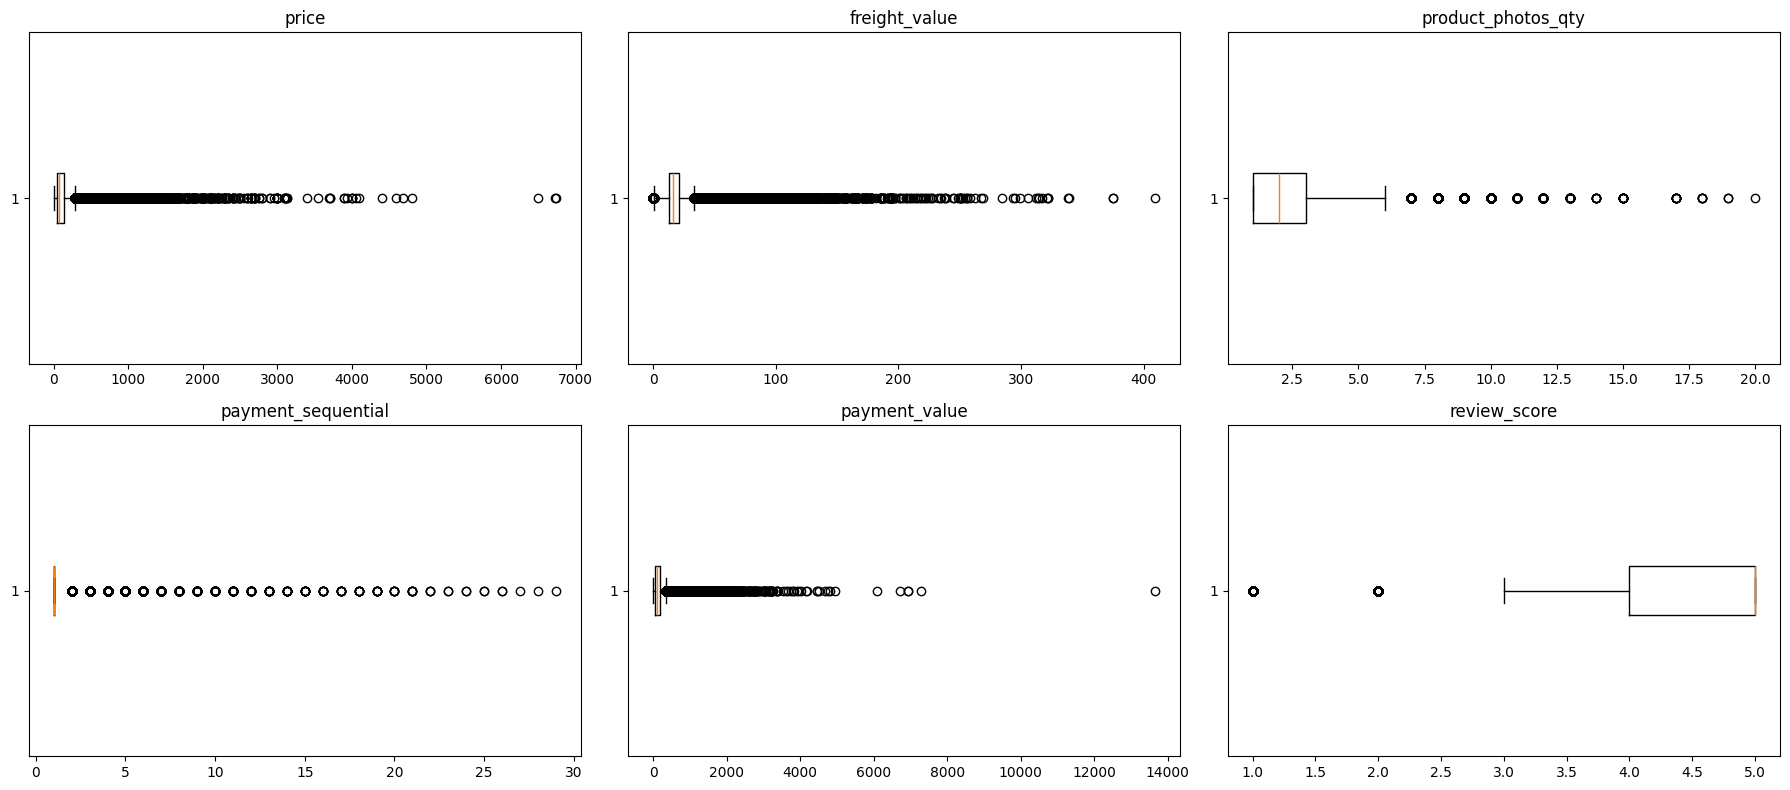

In [23]:
# List of numeric columns
num_col = ['price', 'freight_value', 'product_photos_qty', 'payment_sequential', 'payment_value', 'review_score']

# Create subplots with 3x2 grids and size 18x8
fig, ax = plt.subplots(2, 3, figsize=(18,8))

cnt = 0

# Loop through the grids
for i in range(2):

    if cnt >= 7:
            break

    for j in range(3):

        if cnt >= 7:
            break
        
        # We use boxplot from pyplot
        ax[i, j].boxplot(df_olist_filtered[num_col[cnt]], vert=False)
        ax[i, j].set_title(str(num_col[cnt]), fontdict={'fontsize':12})

        # Increment counter
        cnt = cnt+1

# Make sure layout is not overlapping
fig.tight_layout()
# Show the graphs
fig.show()

In [24]:
df_olist_filtered.describe()

,order_purchase_timestamp,price,freight_value,product_photos_qty,payment_sequential,payment_value,review_score,year,month,date
count,105692,105692.000000,105692.000000,105692.000000,105692.000000,105692.000000,105692.000000,105692.000000,105692.000000,105692.000000
mean,2017-12-31 01:24:18.988069120,124.547694,20.190649,2.237085,1.093157,157.487456,4.082655,2017.538612,6.036483,15.522074
min,2016-09-04 21:15:19,0.850000,0.000000,1.000000,1.000000,0.000000,1.000000,2016.000000,1.000000,1.000000
25%,2017-09-11 14:15:11.249999872,40.500000,13.177500,1.000000,1.000000,57.820000,4.000000,2017.000000,3.000000,8.000000
50%,2018-01-18 16:23:05,78.000000,16.390000,2.000000,1.000000,102.230000,5.000000,2018.000000,6.000000,16.000000
75%,2018-05-04 17:29:22.249999872,139.000000,21.302500,3.000000,1.000000,176.780000,5.000000,2018.000000,8.000000,23.000000
max,2018-09-03 09:06:57,6735.000000,409.680000,20.000000,29.000000,13664.080000,5.000000,2018.000000,12.000000,31.000000
std,NaN,189.314723,15.947553,1.741063,0.716486,218.433366,1.350799,0.505052,3.222239,8.666783


Text(0.5, 1.0, 'Distribution of Price')

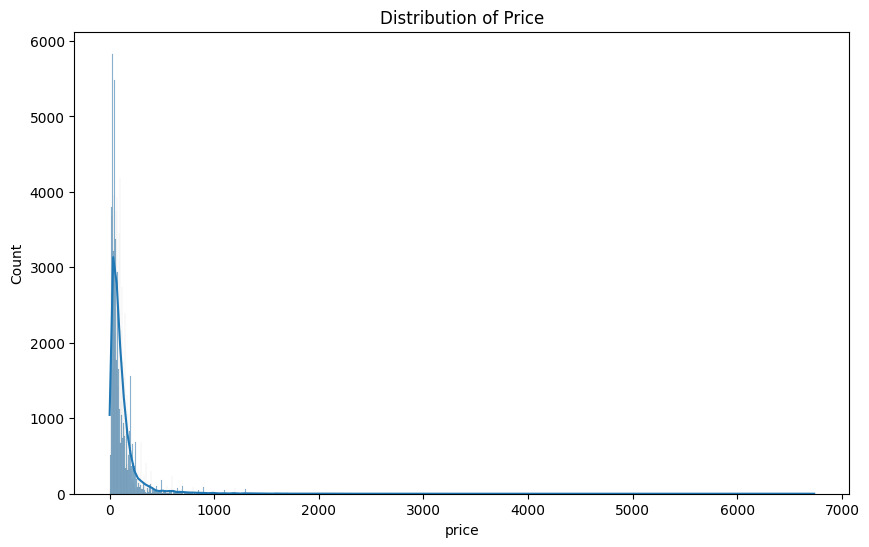

In [25]:
fig, ax = plt.subplots(figsize= (10, 6))

sns.histplot(df_olist_filtered['price'], kde=True)
plt.title('Distribution of Price')

Text(0.5, 1.0, 'Distribution of Freight Value')

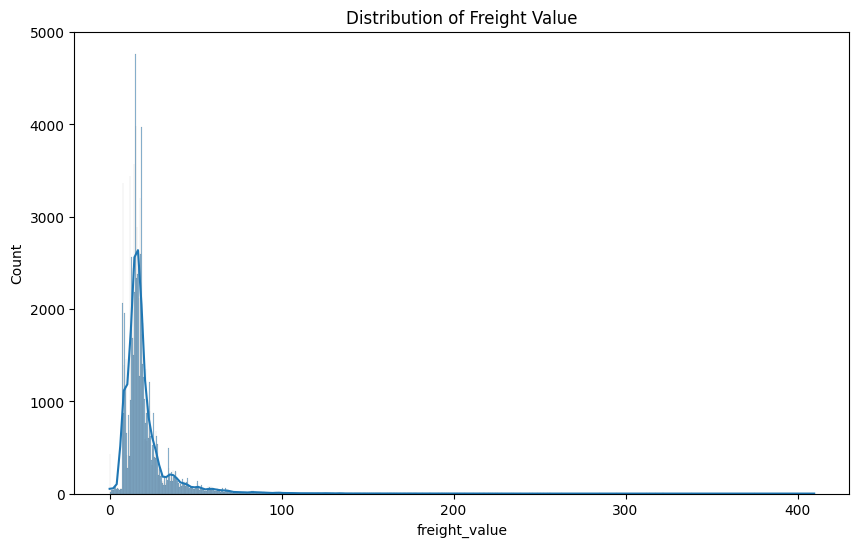

In [26]:
fig, ax = plt.subplots(figsize= (10, 6))

sns.histplot(df_olist_filtered['freight_value'], kde=True)
plt.title('Distribution of Freight Value')

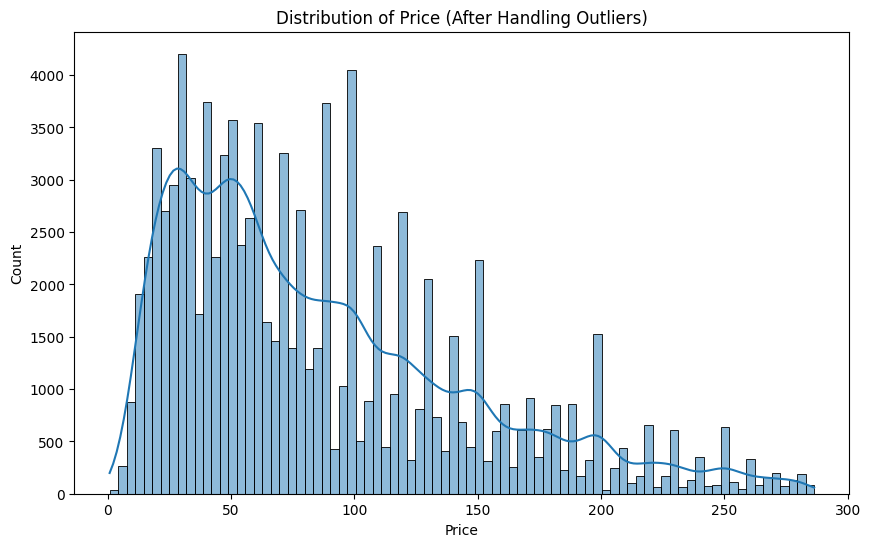

In [27]:
# Try handling outlier for price column
import copy

# Copy original dataset
# So we don't have to reset from the start
df_olist_capped = copy.deepcopy(df_olist_filtered) 
# *Note: We can use df_olist_filtered again later for handling outlier of other column


Q1 = df_olist_capped['price'].quantile(0.25)
Q3 = df_olist_capped['price'].quantile(0.75)
IQR = Q3 - Q1


lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Identify outliers in the 'price' column
# outliers = df_olist_capped[(df_olist_capped['price'] < lower) | (df_olist_capped['price'] > upper)]


# Drop the outliers from the DataFrame
df_olist_capped = df_olist_capped[~((df_olist_capped['price'] < lower) | (df_olist_capped['price'] > upper))]

plt.figure(figsize=(10, 6))
sns.histplot(df_olist_capped['price'], kde=True)
plt.title("Distribution of Price (After Handling Outliers)")
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [28]:
# Now we can create function handling outliers like above
# Use capped variable for called our dataframe what we want to capped
df_capped = copy.deepcopy(df_olist_filtered) 

def capping_outlier(col):
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Drop the outliers from the DataFrame
    df_olist_capped = df_capped[~((df_capped[col] < lower) | (df_capped[col] > upper))]
    
    return df_olist_capped
    
outlier_col = ['price', 'freight_value', 'payment_value', 'product_photos_qty']

for col in outlier_col:
    capping_outlier(col)
    
# We can save our clean dataframe with copy
df_olist_clean = copy.deepcopy(df_olist_capped)
df_olist_clean.head()

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,seller_id,price,freight_value,product_photos_qty,payment_sequential,...,payment_value,review_score,customers_uniq_id,customers_zip_code_prefix,customer_city,customer_state,product_category_name_english,year,month,date
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,4,1,...,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,2017,10,2
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,4,3,...,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,2017,10,2
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,4,2,...,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,2017,10,2
3,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-28 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,4,1,...,37.77,4,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,housewares,2017,8,15
4,0e7e841ddf8f8f2de2bad69267ecfbcf,delivered,2017-08-02 18:24:47,2017-08-15 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,4,1,...,37.77,5,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,housewares,2017,8,2


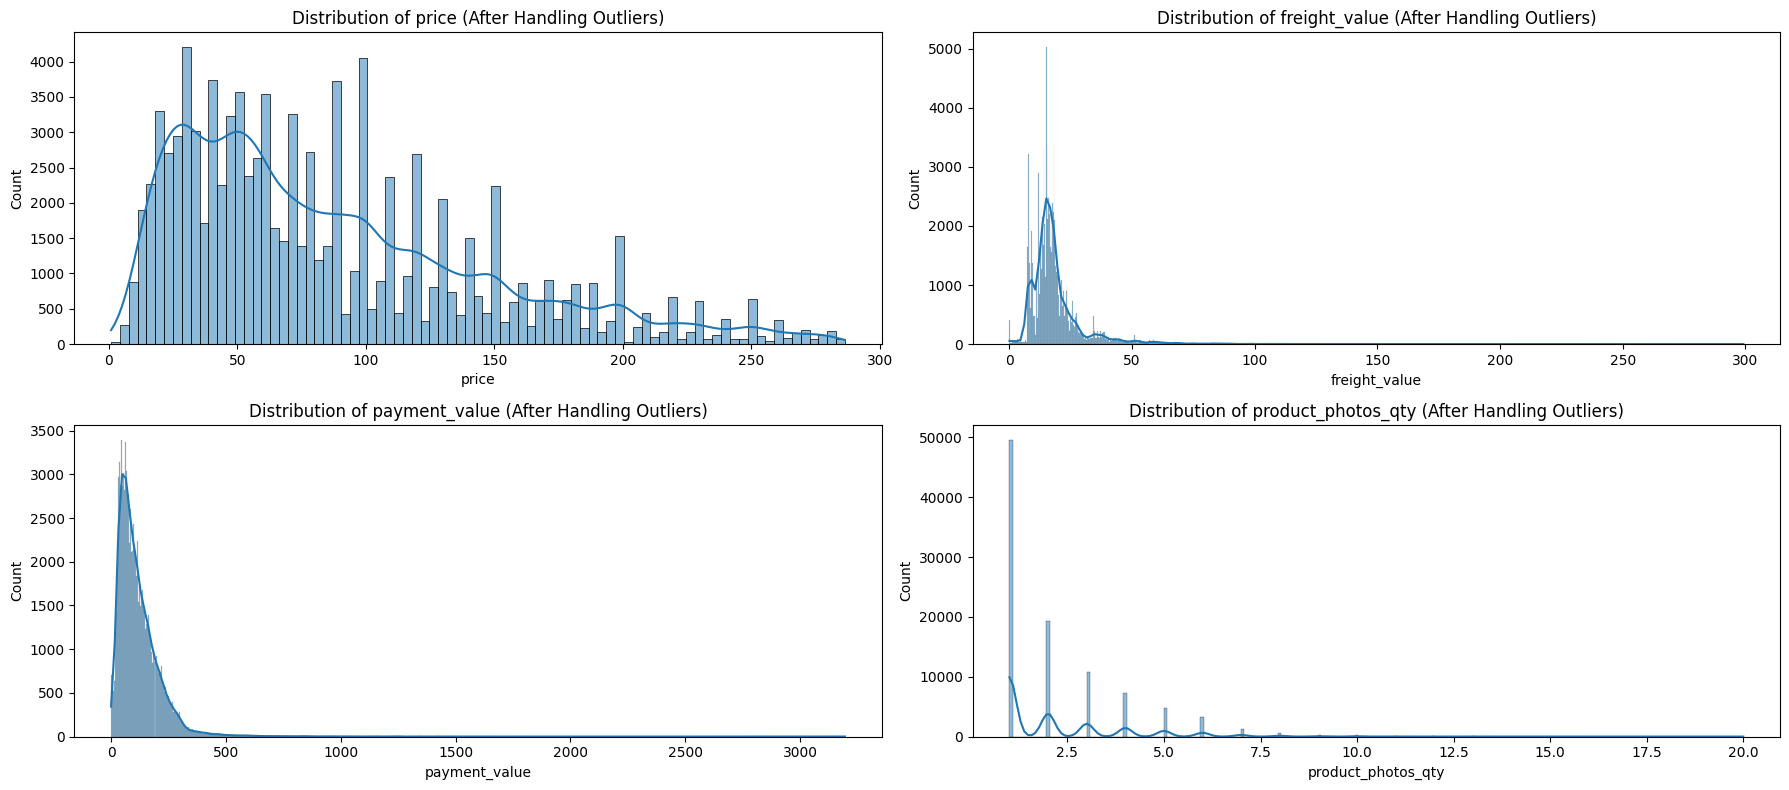

In [29]:
# Test visualize distribution for column what we need
outlier_col = ['price', 'freight_value', 'payment_value', 'product_photos_qty']

fig, ax = plt.subplots(2, 2, figsize=(18, 8))

for i in range(2):
    for j in range(2):
        sns.histplot(df_olist_capped[outlier_col[i*2+j]], kde=True, ax=ax[i, j])
        ax[i, j].set_title(f"Distribution of {outlier_col[i*2+j]} (After Handling Outliers)", fontdict={'fontsize':12})
        ax[i, j].set_xlabel(outlier_col[i*2+j], fontdict={'fontsize':10})
        ax[i, j].set_ylabel("Count", fontdict={'fontsize':10})

# Make sure layout is not overlapping
fig.tight_layout()

# Show the graphs
plt.show()
    
    
    
    
    # This is scratch
    # """
    # # plt.figure(figsize=(18, 8))
    # # sns.histplot(df_olist_clean[outlier_col[i]], kde=True)
    # # plt.title(f"Distribution of {outlier_col[i]} (After Handling Outliers)")
    # # plt.xlabel(outlier_col[i])
    # # plt.ylabel('Count')
    # # plt.show()
    # """

### 4. Analysis

##### Mission 1: Ingin mengetahui Kategori Produk yang paling diminati/paling banyak di order

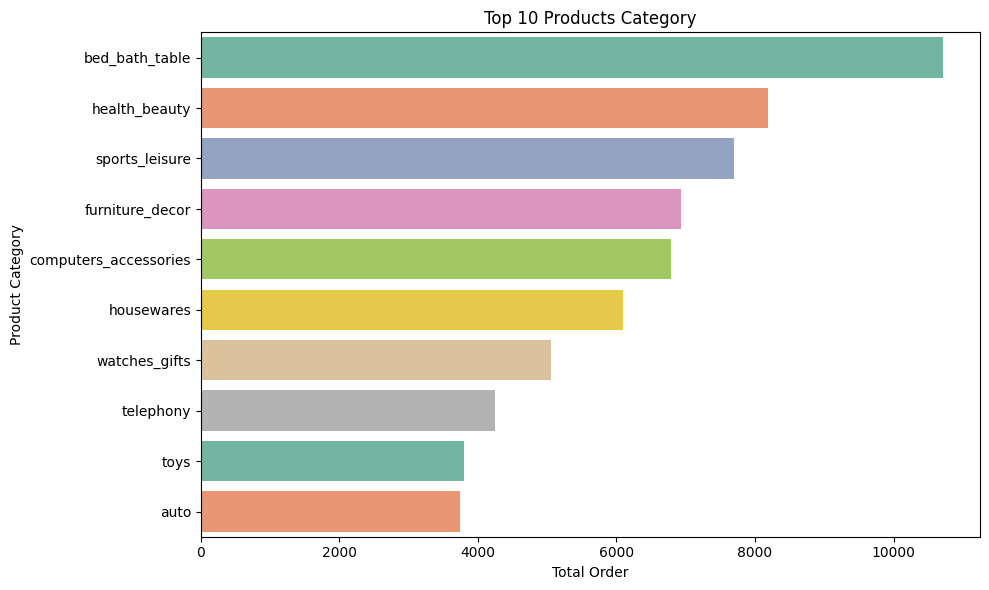

In [30]:
top_products_category = df_olist_clean.groupby("product_category_name_english").count()[['order_id']].sort_values(by='order_id', ascending=False).reset_index()[:10]

plt.figure(figsize=(10, 6))

sns.barplot(data=top_products_category, x='order_id', y='product_category_name_english', palette='Set2')
plt.title("Top 10 Products Category")
plt.ylabel("Product Category")
plt.xlabel("Total Order")

# Make sure layout is not overlapping
plt.tight_layout()

# Show the graphs
plt.show()

C:\Users\nugra\AppData\Local\Temp\ipykernel_7500\2959699122.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


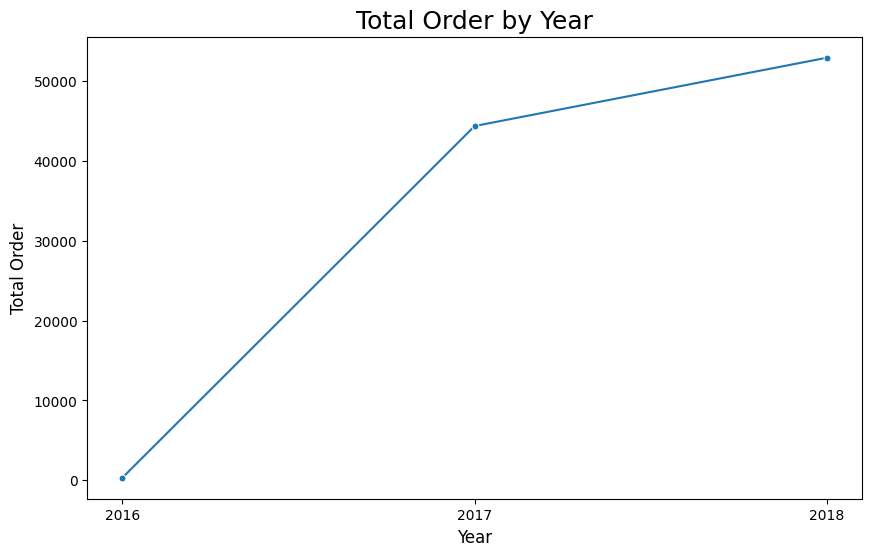

In [31]:
# Group by order
df_olist_clean["year_pure"] = df_olist_clean['order_purchase_timestamp'].dt.strftime('%Y')
order_per_year = df_olist_clean.groupby(["year_pure"]).count()[['order_id']]

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(data=order_per_year, marker='o', markersize=5, color='blue')
ax.set_title('Total Order by Year', fontsize=18)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total Order', fontsize=12)
ax.get_legend().remove()
fig.show()

C:\Users\nugra\AppData\Local\Temp\ipykernel_7500\1926032321.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


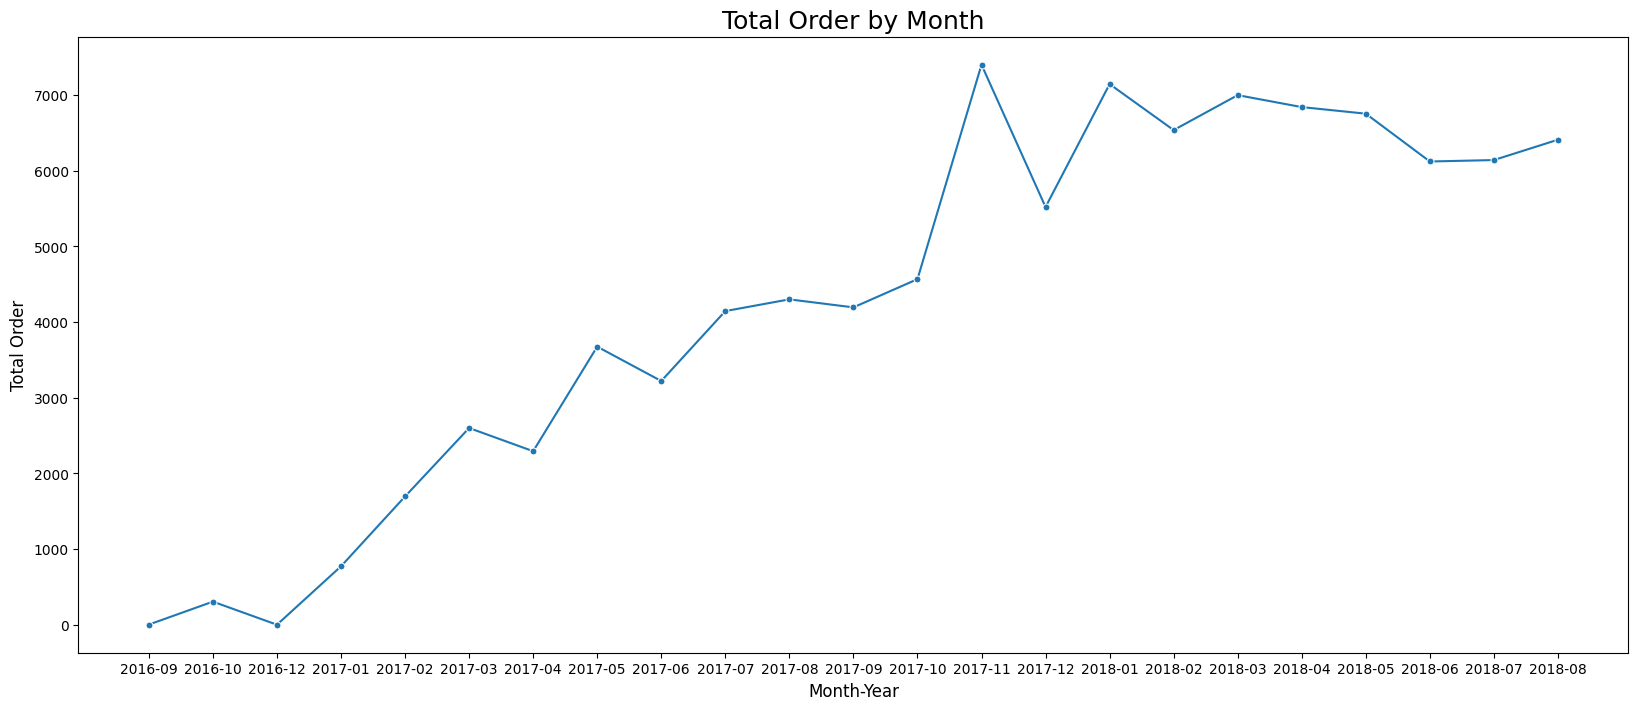

In [38]:
# Let's see if we have to see by year of month

# Add new column for month-year
df_olist_clean['month_year'] = df_olist_clean['order_purchase_timestamp'].dt.strftime('%Y-%m')

# Group by order
order_per_month = df_olist_clean.groupby(['month_year']).count()[['order_id']]

# Exclude last month because only 1 records found
order_per_month = order_per_month.iloc[:-1]

# Visualization
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.lineplot(data=order_per_month, marker='o', markersize=5, color='green')
ax.set_title('Total Order by Month', fontsize=18)
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Total Order', fontsize=12)
ax.get_legend().remove()
fig.show()

C:\Users\nugra\AppData\Local\Temp\ipykernel_7500\3480164436.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


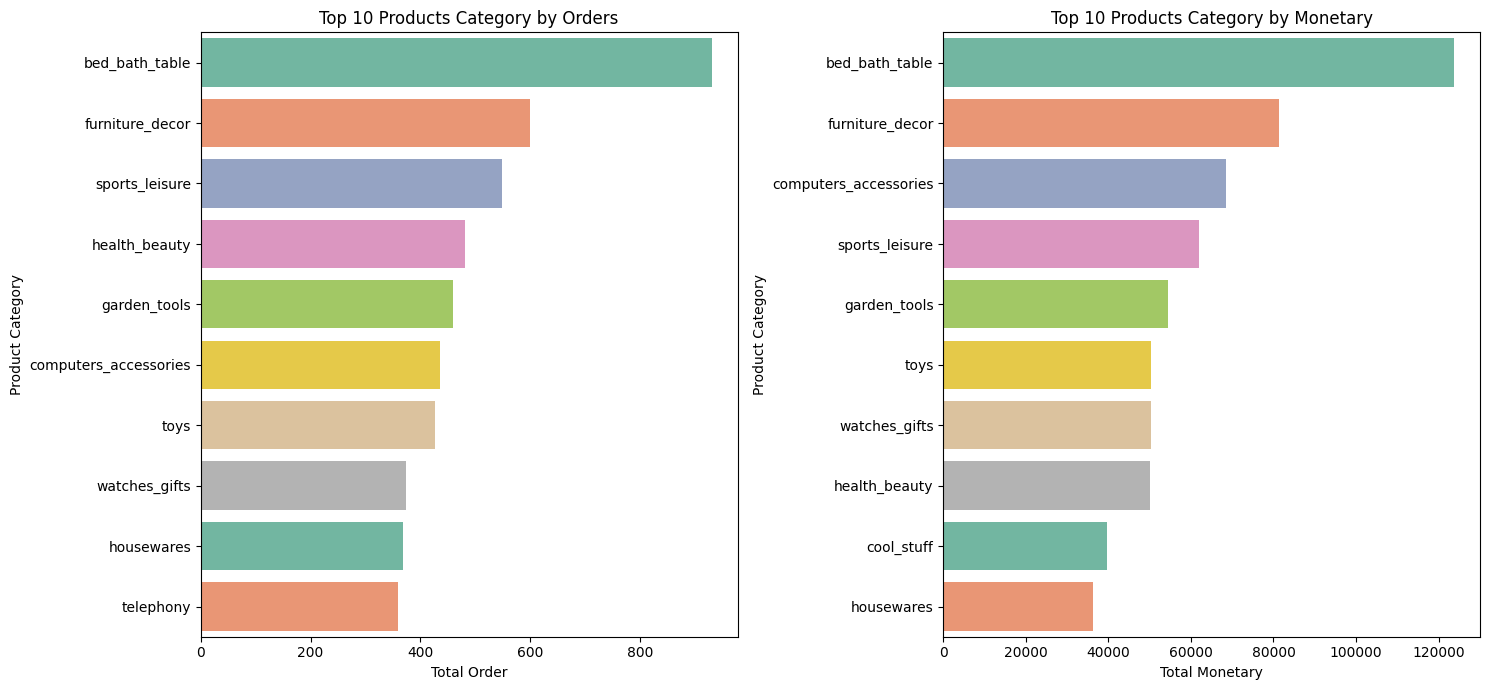

In [52]:
products_by_order = df_olist_clean.groupby(["product_category_name_english", "month_year"]).filter(lambda x: any(x["month_year"] == "2017-11")).groupby("product_category_name_english")['order_id'].count().reset_index().sort_values(by='order_id', ascending=False).head(10)
product_by_payment_value = df_olist_clean[df_olist_clean['month_year'] == "2017-11"].groupby('product_category_name_english')['payment_value'].sum().reset_index().sort_values(by='payment_value', ascending=False).head(10)

fig, ax = plt.subplots(1, 2, figsize=(15,7))

# Plot barplot [0]
sns.barplot(data=products_by_order, x='order_id', y='product_category_name_english', palette='Set2', ax=ax[0])
ax[0].set_title("Top 10 Products Category by Orders", fontdict={'fontsize':12})
ax[0].set_xlabel("Total Order", fontdict={'fontsize':10})
ax[0].set_ylabel("Product Category", fontdict={'fontsize':10})

# Plot barplot [1]
sns.barplot(data=product_by_payment_value, x='payment_value', y='product_category_name_english', palette='Set2', ax=ax[1])
ax[1].set_title("Top 10 Products Category by Monetary", fontdict={'fontsize':12})
ax[1].set_xlabel("Total Monetary", fontdict={'fontsize':10})
ax[1].set_ylabel("Product Category", fontdict={'fontsize':10})


# Make sure layout is not overlapping
fig.tight_layout()

# Show the graphs
fig.show()


In [33]:
df_olist_clean.dtypes

order_id                                 object
order_status                     string[python]
order_purchase_timestamp         datetime64[ns]
order_estimated_delivery_date            object
product_id                               object
seller_id                                object
price                                   float64
freight_value                           float64
product_photos_qty                        int32
payment_sequential                        int32
payment_type                     string[python]
payment_value                           float64
review_score                              int32
customers_uniq_id                        object
customers_zip_code_prefix                object
customer_city                    string[python]
customer_state                   string[python]
product_category_name_english            object
year                                      int32
month                                     int32
date                                    

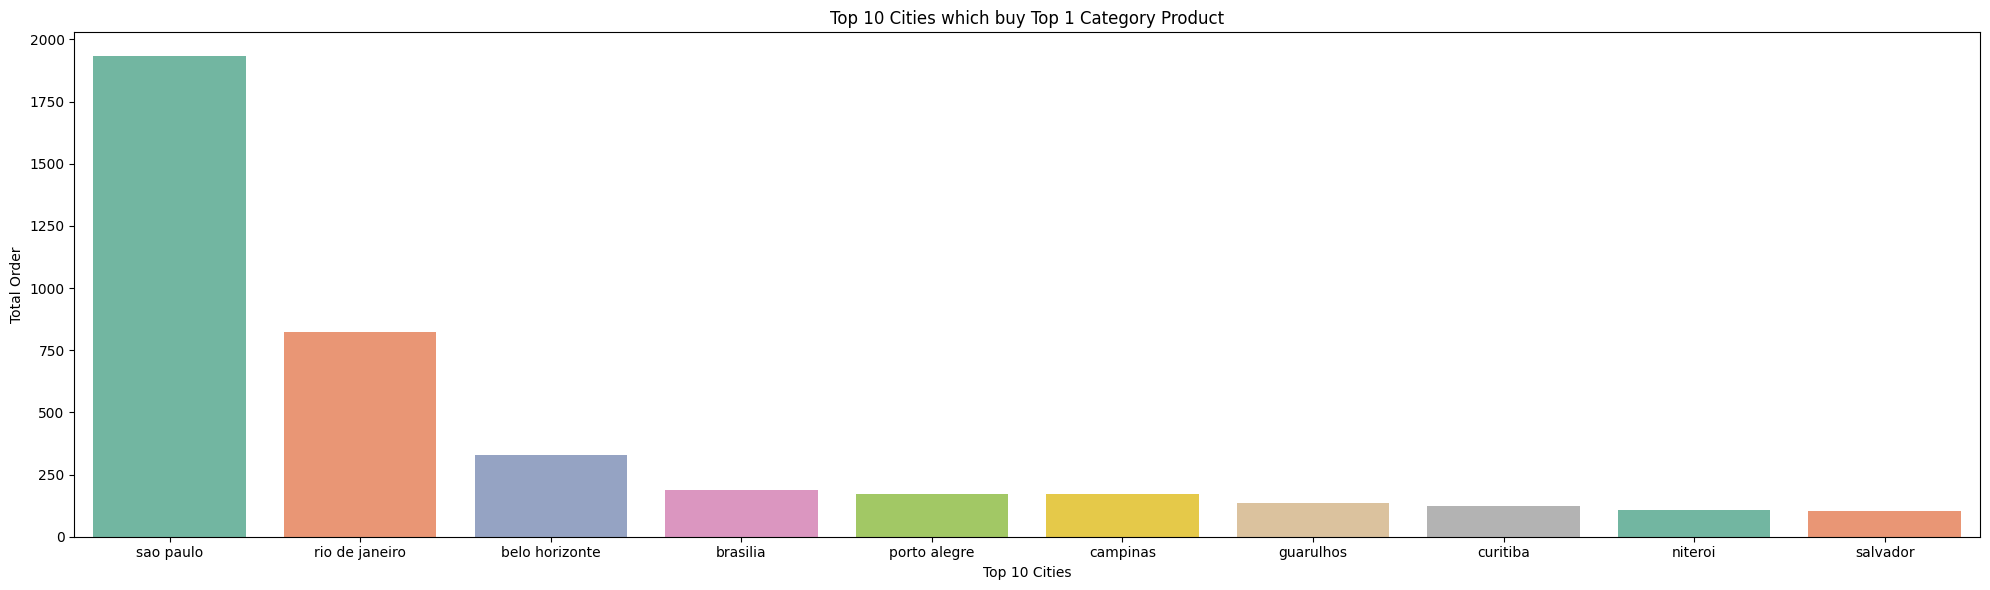

In [69]:
# Get top 10 cities which purchase top 1 of category
top_20_cities = df_olist_clean[df_olist_clean['product_category_name_english'] == 'bed_bath_table'].groupby("customer_city")['order_id'].count().reset_index().sort_values(by='order_id', ascending=False).head(10)


plt.figure(figsize=(20, 6))
sns.barplot(data=top_20_cities, x='customer_city', y='order_id', palette='Set2')
plt.title("Top 10 Cities which buy Top 1 Category Product")
plt.ylabel("Total Order")
plt.xlabel("Top 10 Cities")

# Make sure layout is not overlapping
plt.tight_layout()

# Show the graphs
plt.show()


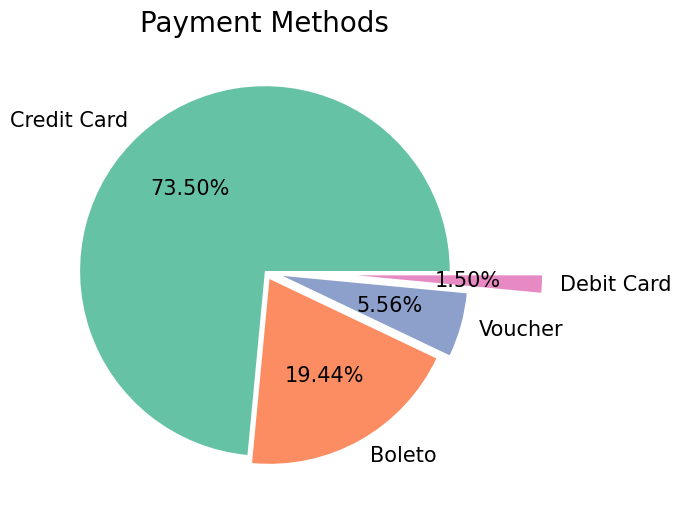

In [71]:
# Get Top often used payment gateway
payment_type_counts = df_olist_clean['payment_type'].value_counts()

plt.figure(figsize=(10, 6))

labels = ['Credit Card', 'Boleto', 'Voucher', 'Debit Card']
explode = (0, 0.05, 0.1, 0.5) # Use explode for looks fragged per pieces of the bar

# Plot the pie chart
plt.pie(x=payment_type_counts, labels=labels, autopct='%1.2f%%', explode=explode, colors=sns.color_palette('Set2'), textprops={'fontsize': 15})

# Set the title
plt.title('Payment Methods', fontsize=20)

# Display the plot
plt.show()

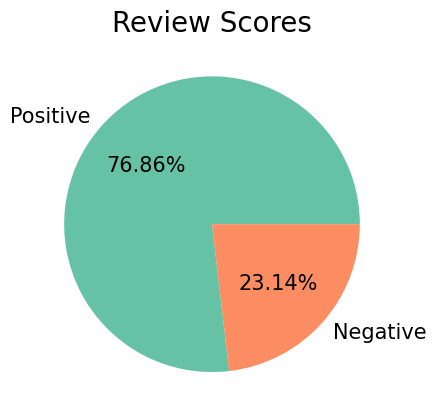

In [76]:
# Get all counts for the review score from a customers

# Filter data berdasarkan review_score
final_scores = df_olist_clean['review_score'].apply(lambda x: 'Positive' if x > 3 else 'Negative')

# Hitung jumlah review positif dan negatif
positive_count = (final_scores == 'Positive').sum()
negative_count = (final_scores == 'Negative').sum()

# Labels dan data
labels = ['Positive', 'Negative']
data = [positive_count, negative_count]

# Plot the pie chart
plt.pie(data, labels=labels, autopct='%1.2f%%', colors=sns.color_palette('Set2'), textprops={'fontsize': 15})

# Set the title
plt.title('Review Scores', fontsize=20)

# Display the plot
plt.show()